# Developing a Loan Scoring Algorithm for "Prêt à dépenser"

### Notebook by [Nasr-edine DRAI](https://www.hackerrank.com/d_nasredine)



### [Openclassrooms](https://openclassrooms.com/en/)

## Introduction

In this project, you are a Data Scientist working at "Prêt à dépenser", a financial company that offers consumer credits to people with little or no loan history. The company wants to implement a credit scoring tool that calculates the probability of a customer repaying a loan and then classifies the loan application as approved or rejected. The goal is to develop a classification algorithm to help decide if a loan can be granted to a customer.

## The problem domain

The customer relationship managers will be the users of the scoring tool. As they interact with customers, they need your model to be easily interpretable. The relationship managers also want a measure of the importance of the variables that led the model to give a particular probability to a customer.

<img src="../imgs/french_public_health_agency.png" />

## Verify Python Virtual Environments

#### Check the Version of the Python Interpreter

In [1]:
!python --version

Python 3.10.1


#### Verify that I'm using the right virtual environment

In [2]:
!pip -V

pip 23.0 from /Users/drainasr-edine/github/ingenieur_ia/P4_drai_nasr-edine/.venv/lib/python3.10/site-packages/pip (python 3.10)


#### Check Installed Modules in Python

Run through this notebook to make sure my environment is properly setup. Be sure to launch Jupyter from inside the virtual environment.

In [3]:
import os, sys

parent = os.path.abspath('..')
sys.path.insert(1, parent)
print(parent)

/Users/drainasr-edine/github/ingenieur_ia/P4_drai_nasr-edine


In [4]:
from src.check_environment import run_checks

This code allows me to import modules from the parent directory in my notebook

In [5]:
from src.check_environment import run_checks
run_checks()

Using Python in /Users/drainasr-edine/github/ingenieur_ia/P4_drai_nasr-edine/.venv:
[ OK ] Python is version 3.10.1 (v3.10.1:2cd268a3a9, Dec  6 2021, 14:28:59) [Clang 13.0.0 (clang-1300.0.29.3)]

[ OK ] jupyterlab
[ OK ] jupyterlab_git
[ OK ] matplotlib
[ OK ] numpy
[ OK ] pandas
[ OK ] seaborn
[ OK ] statsmodels
[ OK ] plotly
[ OK ] colorama
[ OK ] sklearn
[ OK ] missingno
[ OK ] wordcloud


## Import Python library for data science

In [2]:
import os

# NumPy library for numerical computing
import numpy as np

# Import the statsmodels library for statistical analysis and modeling
import statsmodels.api as sm

# Pandas library for data manipulation and analysis
import pandas as pd

# Matplotlib library for data visualization
import matplotlib.pyplot as plt

# Seaborn library for data visualization based on Matplotlib
import seaborn as sns

# Scikit-Learn library for machine learning
# import sklearn

# Tensorflow library for building and training machine learning models
# import tensorflow as tf

# Wordcloud library for generating word clouds from text data
# from wordcloud import WordCloud

### Display CSV Files with Their Sizes in a Pandas DataFrame

In [3]:
os.listdir('../data')

['application_test.csv',
 'Projet+Mise+en+prod+-+home-credit-default-risk',
 'HomeCredit_columns_description.csv',
 'POS_CASH_balance.csv',
 'credit_card_balance.csv',
 'installments_payments.csv',
 'application_train.csv',
 'bureau.csv',
 '.ipynb_checkpoints',
 'previous_application.csv',
 'bureau_balance.csv',
 'sample_submission.csv']

In [4]:

folder_path = '../data'
file_list = os.listdir(folder_path)

file_details = []
for file_name in file_list:
    if file_name.endswith(".csv"):
        file_path = os.path.join(folder_path, file_name)
        file_size = os.path.getsize(file_path)
        file_details.append([file_name, file_size/10**6])

df_csv_files = pd.DataFrame(file_details, columns=["Name", "Size (MB)"])
df_csv_files.sort_values("Size (MB)", axis=0, ascending=True, inplace=True)
df_csv_files


,Name,Size (MB)
1,HomeCredit_columns_description.csv,0.037383
9,sample_submission.csv,0.536202
0,application_test.csv,26.567651
5,application_train.csv,166.133370
6,bureau.csv,170.016717
8,bureau_balance.csv,375.592889
2,POS_CASH_balance.csv,392.703158
7,previous_application.csv,404.973293
3,credit_card_balance.csv,424.582605
4,installments_payments.csv,723.118349


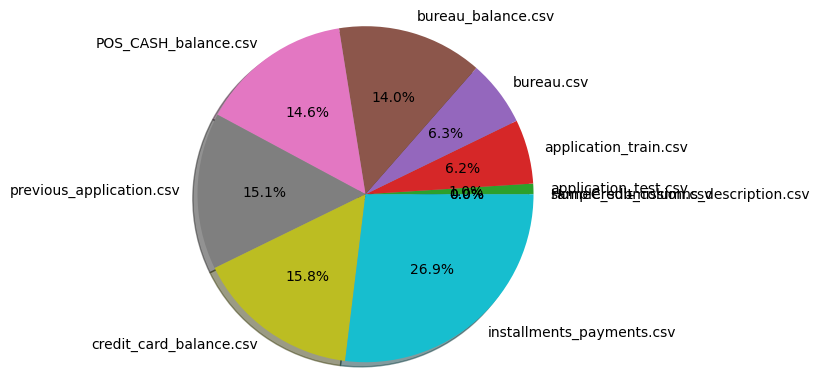

In [5]:
sizes = df_csv_files['Size (MB)'].tolist()
labels = df_csv_files['Name'].tolist()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')

plt.show()


## Data collection

### Importing and Previewing CSV Data Files with Pandas

In [9]:
# header = ["Table", "Row", "Description", "Special",]

# df_homeCredit_columns_description = pd.read_csv("../data/HomeCredit_columns_description.csv", skiprows=1, names=header, index_col=0, encoding = 'unicode_escape')
# df_homeCredit_columns_description.head()

In [10]:
# Import sample_submission.csv
# df_sample_submission = pd.read_csv("../data/sample_submission.csv", sep=',')
# df_sample_submission.head()

In [11]:
# Import application_test.csv
# df_application_test = pd.read_csv("../data/application_test.csv", sep=',')
# df_application_test.head()

In [12]:
# Import application_train.csv
# df_application_train = pd.read_csv("../data/application_train.csv", sep=',')
# df_application_train.head()

In [13]:
# Import bureau.csv
# df_bureau = pd.read_csv("../data/bureau.csv", sep=',')
# df_bureau.head()

In [14]:
# Import bureau_balance.csv
# df_bureau_balance = pd.read_csv("../data/bureau_balance.csv", sep=',')
# df_bureau_balance.head()

In [15]:
# Import POS_CASH_balance.csv
# df_POS_CASH_balance = pd.read_csv("../data/POS_CASH_balance.csv", sep=',')
# df_POS_CASH_balance.head()

In [16]:
# Import previous_application.csv
# df_previous_application = pd.read_csv("../data/previous_application.csv", sep=',')
# df_previous_application.head()

In [17]:
# Import credit_card_balance.csv
# df_credit_card_balance = pd.read_csv("../data/credit_card_balance.csv", sep=',')
# df_credit_card_balance.head()

In [18]:
# Import installments_payments.csv
# df_installments_payments = pd.read_csv("../data/installments_payments.csv", sep=',')
# df_installments_payments.head()